In [7]:
# 定义原始矩阵
import anndata as ad
import numpy as np
adata = ad.read_h5ad("D:\新建文件夹 (7)\m_ako_part1").X
subset_adata = adata[:100, :100]

In [1]:
import anndata as ad
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model

# 加载数据
adata = ad.read_h5ad("D:\\新建文件夹 (7)\\m_ako_part1")
# 提取矩阵数据
original_data = adata.X[:100, :100]

# 定义自动编码器的输入层
input_size = original_data.shape[1]  # 输入层的维度
input_layer = Input(shape=(input_size,))

# 编码层
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)

# 解码层
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(input_size, activation='sigmoid')(decoded)

# 将输入层和输出层连接起来构建自动编码器模型
autoencoder = Model(input_layer, decoded)

# 编译自动编码器模型
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 训练自动编码器
autoencoder.fit(original_data, original_data, epochs=50, batch_size=256, shuffle=True)

# 使用自动编码器重建数据
reconstructed_data = autoencoder.predict(original_data)

# 打印重建数据与原始数据对比
print("Original Data:\n", original_data)
print("Reconstructed Data:\n", reconstructed_data)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6923
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.6909
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6894
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.6877
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6859
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6839
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6816
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6791
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6763
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6732
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6698
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.6660
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6618
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6572
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6521
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import anndata as ad
import scipy

# 加载数据
adata = ad.read_h5ad("D:\\新建文件夹 (7)\\m_ako_part1")
# 提取矩阵数据
original_data = adata.X[:100, :100]

features = torch.tensor(adata.X[:100, :100].toarray()) if isinstance(adata.X[:100, :100], scipy.sparse.spmatrix) else torch.tensor(adata.X[:100, :100])

In [3]:
import numpy as np
from scipy.sparse import coo_matrix

# 假设 coo_matrix 是一个 COO 格式的稀疏矩阵
row = np.array([0, 1, 2, 3])
col = np.array([2, 4, 1, 3])
data = np.array([3, 5, 6, 7])
coo_matrix = coo_matrix((data, (row, col)), shape=(4, 5))

# 转换为稠密矩阵
dense_matrix = np.zeros(coo_matrix.shape)
dense_matrix[coo_matrix.row, coo_matrix.col] = coo_matrix.data

print(dense_matrix)


[[0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 5.]
 [0. 6. 0. 0. 0.]
 [0. 0. 0. 7. 0.]]


In [4]:
import numpy as np
from scipy.sparse import coo_matrix

# 假设 coo_matrix 是一个 COO 格式的稀疏矩阵
row = np.array([0, 1, 2, 3])
col = np.array([2, 4, 1, 3])
data = np.array([3, 5, 6, 7])
coo_matrix = coo_matrix((data, (row, col)), shape=(4, 5))
print(coo_matrix)

  (0, 2)	3
  (1, 4)	5
  (2, 1)	6
  (3, 3)	7


In [5]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        # 定义编码器
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 8),
            nn.ReLU(),
        )
        # 定义解码器
        self.decoder = nn.Sequential(
            nn.Linear(8, 128),
            nn.ReLU(),
            nn.Linear(128, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
model = Autoencoder(adata.X[:100, :100].shape[1])

In [6]:
# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 创建数据集和数据加载器
dataset = TensorDataset(features, features)  # 自编码器的输入和输出相同
data_loader = DataLoader(dataset, batch_size=128, shuffle=True)

In [7]:
import time

# 训练模型
num_epochs = 100
avg_losses = []
for epoch in range(num_epochs):
    start_time = time.time()
    losses = []
    for data, _ in data_loader:
        
        data = data.float()
        # 前向传播
        outputs = model(data)
        loss = criterion(outputs, data)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    # 计算并打印每个周期的平均损失
    epoch_loss = sum(losses) / len(losses)
    avg_losses.append(epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Time: {time.time() - start_time:.2f}s')

Epoch [1/100], Loss: 0.0073, Time: 0.17s
Epoch [2/100], Loss: 0.0066, Time: 0.01s
Epoch [3/100], Loss: 0.0064, Time: 0.01s
Epoch [4/100], Loss: 0.0065, Time: 0.01s
Epoch [5/100], Loss: 0.0065, Time: 0.01s
Epoch [6/100], Loss: 0.0065, Time: 0.01s
Epoch [7/100], Loss: 0.0064, Time: 0.01s
Epoch [8/100], Loss: 0.0064, Time: 0.01s
Epoch [9/100], Loss: 0.0064, Time: 0.01s
Epoch [10/100], Loss: 0.0063, Time: 0.01s
Epoch [11/100], Loss: 0.0063, Time: 0.01s
Epoch [12/100], Loss: 0.0063, Time: 0.01s
Epoch [13/100], Loss: 0.0063, Time: 0.01s
Epoch [14/100], Loss: 0.0062, Time: 0.01s
Epoch [15/100], Loss: 0.0062, Time: 0.01s
Epoch [16/100], Loss: 0.0061, Time: 0.01s
Epoch [17/100], Loss: 0.0061, Time: 0.01s
Epoch [18/100], Loss: 0.0060, Time: 0.01s
Epoch [19/100], Loss: 0.0060, Time: 0.01s
Epoch [20/100], Loss: 0.0059, Time: 0.01s
Epoch [21/100], Loss: 0.0058, Time: 0.01s
Epoch [22/100], Loss: 0.0058, Time: 0.01s
Epoch [23/100], Loss: 0.0058, Time: 0.01s
Epoch [24/100], Loss: 0.0057, Time: 0.01s
E

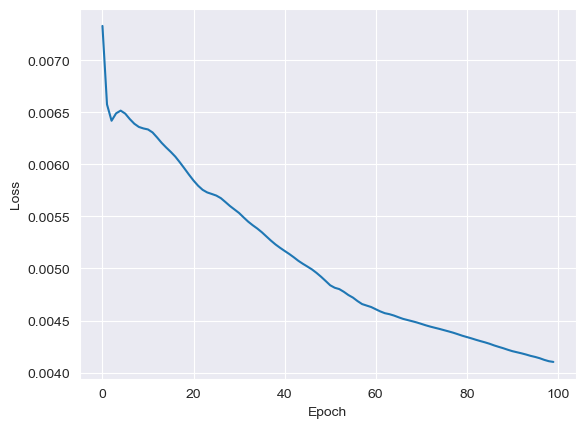

In [8]:
# view loss
import matplotlib.pyplot as plt

plt.plot(avg_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig("D:/Projects/Ragnarok/loss.png", dpi=300)

In [9]:
torch.save(model.state_dict(), 'D:/Projects/Ragnarok/Autoencoder.pth')

In [10]:
model.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=100, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=8, bias=True)
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=100, bias=True)
    (5): ReLU()
  )
)

In [11]:
with torch.no_grad():  # 确保不会计算梯度，以减少内存使用
    # 假设你要对整个数据集进行预测
    features = features.float()
    outputs = model(features)
    outputs = outputs.numpy()

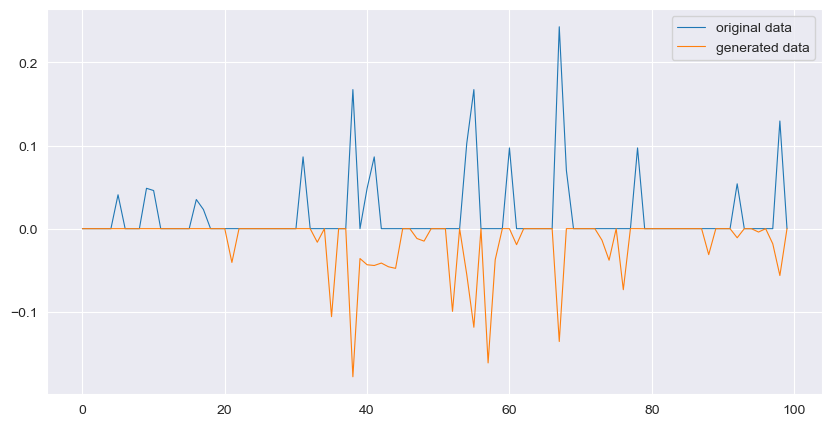

In [13]:
# 创建一个水平镜像图
plt.figure(figsize=(10, 5))

# 绘制原始数据
plt.plot(adata.X[:100, :100][3], label='original data', linewidth=0.8)

# 绘制神经网络生成的数据
plt.plot(-outputs[3], label='generated data', linewidth=0.8)

plt.legend()

# 显示图表
plt.savefig("D:/Projects/Ragnarok/compare.png", dpi=600)